In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot

# About Dataset

This data set consists of three types of entities: (a) the specification of an auto in terms of various characteristics, (b) its assigned insurance risk rating, (c) its normalized losses in use as compared to other cars. The second rating corresponds to the degree to which the auto is more risky than its price indicates. Cars are initially assigned a risk factor symbol associated with its price. Then, if it is more risky (or less), this symbol is adjusted by moving it up (or down) the scale. Actuarians call this process "symboling". A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe.

The third factor is the relative average loss payment per insured vehicle year. This value is normalized for all autos within a particular size classification (two-door small, station wagons, sports/speciality, etc...), and represents the average loss per car per year.

Note: Several of the attributes in the database could be used as a "class" attribute.

# Attributes:

1. symboling: -3, -2, -1, 0, 1, 2, 3.
2. normalized-losses: continuous from 65 to 256.
3. make:
alfa-romero, audi, bmw, chevrolet, dodge, honda,
isuzu, jaguar, mazda, mercedes-benz, mercury,
mitsubishi, nissan, peugot, plymouth, porsche,
renault, saab, subaru, toyota, volkswagen, volvo

4. fuel-type: diesel, gas.
5. aspiration: std, turbo.
6. num-of-doors: four, two.
7. body-style: hardtop, wagon, sedan, hatchback, convertible.
8. drive-wheels: 4wd, fwd, rwd.
9. engine-location: front, rear.
10. wheel-base: continuous from 86.6 120.9.
11. length: continuous from 141.1 to 208.1.
12. width: continuous from 60.3 to 72.3.
13. height: continuous from 47.8 to 59.8.
14. curb-weight: continuous from 1488 to 4066.
15. engine-type: dohc, dohcv, l, ohc, ohcf, ohcv, rotor.
16. num-of-cylinders: eight, five, four, six, three, twelve, two.
17. engine-size: continuous from 61 to 326.
18. fuel-system: 1bbl, 2bbl, 4bbl, idi, mfi, mpfi, spdi, spfi.
19. bore: continuous from 2.54 to 3.94.
20. stroke: continuous from 2.07 to 4.17.
21. compression-ratio: continuous from 7 to 23.
22. horsepower: continuous from 48 to 288.
23. peak-rpm: continuous from 4150 to 6600.
24. city-mpg: continuous from 13 to 49.
25. highway-mpg: continuous from 16 to 54.
26. price: continuous from 5118 to 45400.

# Loading Data

In [106]:
df = pd.read_csv("imports-85.data",header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [107]:
df.shape

(205, 26)

The dataset csv doesn't have the header. The header information is available at: https://archive.ics.uci.edu/ml/datasets/Automobile

We are adding headers manually as below.

In [108]:
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]

df.columns = headers
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


# Feature Engineering

**We see '?' in the dataframe above which we are replacing with NaN value below**

In [109]:
df=df.replace('?',np.NaN)
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


## Impute Missing values

**Below is the columnwise missing value count.**

In [110]:
df.isnull().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

As we can see from above, here are the 7 columns containing missing values:

"normalized-losses": 41, "num-of-doors": 2, "bore": 4, "stroke" : 4, "horsepower": 2, "peak-rpm": 2, "price": 4

### Categorical Imputation: Replace by mode:

"num-of-doors": 2 missing values, replace them with "four".

**Reason: Since 'four' doors is the most frequent value in this column as shown below, it is the most likely value to occur**

In [111]:
df["num-of-doors"].mode()[0] #df["num-of-doors"].value_counts().idxmax() is also fine

'four'

In [112]:
#replace the missing values by the most frequent value
df["num-of-doors"].fillna(df["num-of-doors"].mode()[0], inplace=True)

### Numerical Imputation: Replace by mean:

"normalized-losses": 41 missing values, replace them with mean

"stroke": 4 missing values, replace them with mean

"bore": 4 missing values, replace them with mean

"horsepower": 2 missing values, replace them with mean

"peak-rpm": 2 missing values, replace them with mean

In [113]:
#Replace the missing values by mean value of respective columns
df["normalized-losses"].fillna(df["normalized-losses"].astype("float").mean(), inplace=True)

df["bore"].fillna(df["bore"].astype("float").mean(), inplace=True)

df["stroke"].fillna(df["stroke"].astype("float").mean(), inplace = True)

df["peak-rpm"].fillna(df["peak-rpm"].astype("float").mean(), inplace = True)

df['horsepower'].fillna(df['horsepower'].astype("float").mean(), inplace=True)

### Dropping the records:

"price": 4 missing values, delete the entire record

**Reason: As price is what we will predict. So records with missing price will no longer be useful for our modeling purpose**

In [114]:
#Drop entire row "price" column is missing
df.dropna(subset=["price"], axis=0, inplace=True)

In [115]:
# reset index as we dropped 2 rows
df.reset_index(drop=True, inplace=True)

In [116]:
# re-checking missing after handling them
df.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

## Check data types

In [117]:
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

**Numerical variables should have type 'float' or 'int' whereas variables with strings should have type 'object'. So, we convert below columns to proper data types**

In [118]:
df[["bore", "stroke","price","peak-rpm"]] = df[["bore", "stroke","price","peak-rpm"]].astype("float")
df[["normalized-losses"]] = df[["normalized-losses"]].astype("int")

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   normalized-losses  201 non-null    int64  
 2   make               201 non-null    object 
 3   fuel-type          201 non-null    object 
 4   aspiration         201 non-null    object 
 5   num-of-doors       201 non-null    object 
 6   body-style         201 non-null    object 
 7   drive-wheels       201 non-null    object 
 8   engine-location    201 non-null    object 
 9   wheel-base         201 non-null    float64
 10  length             201 non-null    float64
 11  width              201 non-null    float64
 12  height             201 non-null    float64
 13  curb-weight        201 non-null    int64  
 14  engine-type        201 non-null    object 
 15  num-of-cylinders   201 non-null    object 
 16  engine-size        201 non

Checking if the data has normal distribution or not: 

<AxesSubplot:ylabel='Density'>

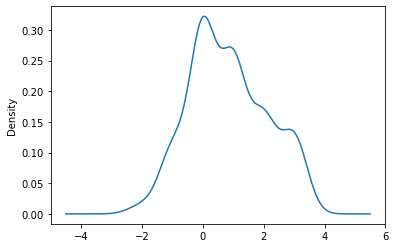

In [120]:
df["symboling"].plot.kde()

# Data Normalization

Why normalization?
Normalization is the process of transforming values of several variables into a similar range. Typical normalizations include scaling the variable so the variable average is 0, scaling the variable so the variance is 1, or scaling variable so the variable values range from 0 to 1

Example

To demonstrate normalization, let's say we want to scale the columns "length", "width" and "height"

<b>Target:</b> would like to Normalize those variables so their value ranges from 0 to 1.

<b>Approach: </b>replace original value by (original value)/(maximum value)

In [121]:
df[["length","width","height"]].head() # these values vary highly w.r.t rest column values

,length,width,height
0,168.8,64.1,48.8
1,168.8,64.1,48.8
2,171.2,65.5,52.4
3,176.6,66.2,54.3
4,176.6,66.4,54.3


In [122]:
# replace (original value) by (original value)/(maximum value) -> Simple Feature Scaling
df['length'] = df['length']/df['length'].max()
df['width'] = df['width']/df['width'].max()
df['height'] = df['height']/df['height'].max()

# show the scaled columns
df[["length","width","height"]].head()

,length,width,height
0,0.811148,0.890278,0.816054
1,0.811148,0.890278,0.816054
2,0.822681,0.909722,0.876254
3,0.848630,0.919444,0.908027
4,0.848630,0.922222,0.908027


## Binning
<b>Why binning?</b>
<p>
    Binning is a process of transforming continuous numerical variables into discrete categorical 'bins', for grouped analysis.
</p>

<b>Example: </b>

<p>In our dataset, "horsepower" is a real valued variable ranging from 48 to 288, it has 57 unique values. What if we only care about the price difference between cars with high horsepower, medium horsepower, and little horsepower (3 types)? Can we rearrange them into three ‘bins' to simplify analysis? </p>

<p>We will use the Pandas method 'cut' to segment the 'horsepower' column into 3 bins </p>

Text(0.5, 1.0, 'horsepower bins')

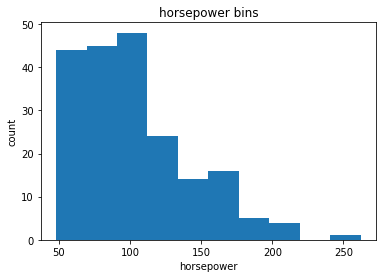

In [123]:
df["horsepower"]=df["horsepower"].astype(int, copy=True)
plt.hist(df["horsepower"])

# set x/y labels and plot title
plt.xlabel("horsepower")
plt.ylabel("count")
plt.title("horsepower bins")

<p>We would like 3 bins of equal size bandwidth so we use numpy's <code>linspace(start_value, end_value, numbers_generated)</code> function.</p>
<p>Since we want to include the minimum value of horsepower we want to set start_value=min(df["horsepower"]).</p>
<p>Since we want to include the maximum value of horsepower we want to set end_value=max(df["horsepower"]).</p>
<p>Since we are building 3 bins of equal length, there should be 4 dividers, so numbers_generated=4.</p>

<b>We build a bin array, with a minimum value to a maximum value, with bandwidth calculated above. The bins will be values used to determine when one bin ends and another begins.</b>

In [124]:
bins = np.linspace(min(df["horsepower"]), max(df["horsepower"]), 4)
bins

array([ 48.        , 119.33333333, 190.66666667, 262.        ])

In [125]:
# We set group names:
group_names = ['Low', 'Medium', 'High']

# We apply the function cut that determine what each value of df['horsepower'] belongs to.
df['horsepower-binned'] = pd.cut(df['horsepower'], bins, labels=group_names, include_lowest=True )

# Lets see the number of vehicles in each bin
df["horsepower-binned"].value_counts()

Low       153
Medium     43
High        5
Name: horsepower-binned, dtype: int64

Text(0.5, 1.0, 'horsepower bins')

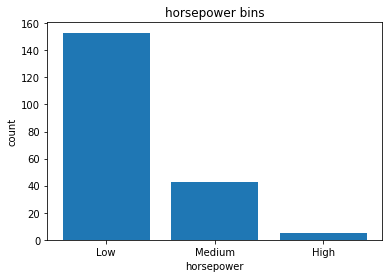

In [126]:
# Lets plot the distribution of each bin.
pyplot.bar(group_names, df["horsepower-binned"].value_counts())

# set x/y labels and plot title
plt.xlabel("horsepower")
plt.ylabel("count")
plt.title("horsepower bins")

Check the dataframe above carefully, you will find the last column provides the bins for "horsepower" with 3 categories ("Low","Medium" and "High")



Text(0.5, 1.0, 'horsepower bins')

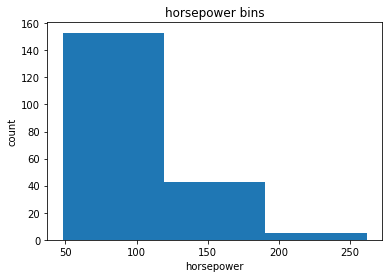

In [127]:
# Bins visualization, Normally, a histogram is used to visualize the distribution of bins we created above.
# draw historgram of attribute "horsepower" with bins = 3
plt.hist(df["horsepower"], bins = 3)

# set x/y labels and plot title
plt.xlabel("horsepower")
plt.ylabel("count")
plt.title("horsepower bins")

## Dummy variable

<b>What is an Dummy variable?</b>
<p>
    Dummy variable is a numerical variable used to label categories. They are called 'dummies' because the numbers themselves don't have inherent meaning. 
</p>

<b>Why we use Dummy variables?</b>

<p>
    So we can use categorical variables for regression analysis in the later modules.
</p><br>
<b>Example</b>
<p>
    We see the column "fuel-type" has two unique values, "gas" or "diesel". Regression doesn't understand words, only numbers. To use this attribute in regression analysis, we convert "fuel-type" into indicator variables.
</p>

<p>
    We will use the panda's method 'get_dummies' to assign numerical values to different categories of fuel type. 
</p>

</div>

In [128]:
dummy_variable_1 = pd.get_dummies(df["fuel-type"])
dummy_variable_1.sample(5)

,diesel,gas
15,0,1
97,0,1
168,0,1
80,0,1
2,0,1


Change column names for clarity, fuel-type-gas value 1 for gas, and 0 for diesel <br>
(When creating dummy variables, a problem that can arise is known as the dummy variable trap. This occurs when we create k dummy variables instead of k-1 dummy variables.
The number of dummy variables we must create is equal to k-1 where k is the number of different values that the categorical variable can take on.)

In [129]:
dummy_variable_1.drop("diesel", axis = 1, inplace=True)
dummy_variable_1.rename(columns={'gas':'fuel-type-gas'}, inplace=True)
dummy_variable_1.head(5)

,fuel-type-gas
0,1
1,1
2,1
3,1
4,1


In the dataframe, column fuel-type has a value for 'gas' and 'diesel'as 0s and 1s now

In [130]:
# merge data frame "df" and "dummy_variable_1" 
df = pd.concat([df, dummy_variable_1], axis=1)

# drop original column "fuel-type" from "df"
df.drop("fuel-type", axis = 1, inplace=True)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,horsepower-binned,fuel-type-gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,3.47,2.68,9.0,111,5000.0,21,27,13495.0,Low,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,3.47,2.68,9.0,111,5000.0,21,27,16500.0,Low,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,2.68,3.47,9.0,154,5000.0,19,26,16500.0,Medium,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,3.19,3.40,10.0,102,5500.0,24,30,13950.0,Low,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,3.19,3.40,8.0,115,5500.0,18,22,17450.0,Low,1


**Repeat for `aspiration` column**

In [131]:
# get indicator variables of aspiration and assign it to data frame "dummy_variable_2"
dummy_variable_2 = pd.get_dummies(df['aspiration'])

Change column names for aspiration, aspiration-turbo value 1 for turbo, and 0 for std

In [132]:
dummy_variable_2.drop("std", axis = 1, inplace=True)
dummy_variable_2.rename(columns={'turbo': 'aspiration-turbo'}, inplace=True)
dummy_variable_2

,aspiration-turbo
0,0
1,0
2,0
3,0
4,0
...,...
196,0
197,1
198,0
199,1


In [133]:
# merge data frame "df" and "dummy_variable_1" 
df = pd.concat([df, dummy_variable_2], axis=1)

# drop original column "fuel-type" from "df"
df.drop("aspiration", axis = 1, inplace=True)
df.head()

,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,horsepower-binned,fuel-type-gas,aspiration-turbo
0,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,2.68,9.0,111,5000.0,21,27,13495.0,Low,1,0
1,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,2.68,9.0,111,5000.0,21,27,16500.0,Low,1,0
2,1,122,alfa-romero,two,hatchback,rwd,front,94.5,0.822681,0.909722,...,3.47,9.0,154,5000.0,19,26,16500.0,Medium,1,0
3,2,164,audi,four,sedan,fwd,front,99.8,0.848630,0.919444,...,3.40,10.0,102,5500.0,24,30,13950.0,Low,1,0
4,2,164,audi,four,sedan,4wd,front,99.4,0.848630,0.922222,...,3.40,8.0,115,5500.0,18,22,17450.0,Low,1,0


## Discretization

## Catergorical Encoding

## Outlier Treatment

# Feature Scaling

# Feature Selection

# Divide data into feature and target

In [27]:
X=df.iloc[:,0:24] # Feature matrix
y=df.iloc[:,25]  # Target vector

In [28]:
X.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,four,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,four,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,six,152,mpfi,2.68,3.47,9.0,154,5000.0,19,26
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,four,109,mpfi,3.19,3.40,10.0,102,5500.0,24,30
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,five,136,mpfi,3.19,3.40,8.0,115,5500.0,18,22


In [29]:
y.head()

0       Low
1       Low
2    Medium
3       Low
4       Low
Name: horsepower-binned, dtype: category
Categories (3, object): ['Low' < 'Medium' < 'High']

# Checking the Linear Regression Assumptions

In [31]:
# Fitting the model for CCPP dataset
# lr_model = LinearRegression()
# lr_model.fit(X, y)

# Returning the R^2 for the model
# r2 = lr_model.score(X, y)
# print('R^2: {0}'.format(r2))

# Model Fitting and Performance Evaluation

# Regularization

# Again Model Fitting and Performance Evaluation